<a href="https://colab.research.google.com/github/aliyarinu/Projects/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
import torch
import numpy as np

a = torch.tensor([1,2,3,4])
b = torch.tensor([5,6,7,8])





In [ ]:
x = torch.randn(3, requires_grad=True) #requiresgrad works only for floats not on integers , this x tensor has required grad facility means pytorch keeps track of every operations involving x
y = x.mean()
print(x)
print(y)

tensor([0.5543, 1.4537, 0.8985], requires_grad=True)
tensor(0.9688, grad_fn=<MeanBackward0>)


In [ ]:
y.backward() # backpropogate from y and calculate the gradient with respect to all the tensors that has requiregrad = true
print(x.grad) #gradient of y wrt x

tensor([0.3333, 0.3333, 0.3333])


In [ ]:
z = (y**2).mean()
z.backward()
print(x.grad)

tensor([0.9792, 0.9792, 0.9792])


When is retain_graph=True needed?
When you do multiple backward passes through the same output that depends on a variable (x)

Or when you build a new computation graph from something that still requires gradients and depends on an old graph

In [ ]:
x = torch.randn(2,requires_grad = True)
w = torch.tensor([1,2],dtype=float,requires_grad=True)
y = (x*w).sum()
y.backward()
print(w.grad)

tensor([-1.4749, -1.1422], dtype=torch.float64)


In [ ]:
a = torch.randn(2,3)
b = (a**2).sum()
print(a.requires_grad)

False


In [ ]:
a.requires_grad_(True)

tensor([[ 0.7991, -0.2910,  1.6877],
        [ 1.0251, -0.1857, -0.1571]], requires_grad=True)

In [ ]:
a.detach_()
print(a.requires_grad)

False


In [ ]:
x = torch.randn(2,requires_grad=True)
w = torch.randn(2,requires_grad=True)
print('before',w)
for epoch in range(5):
  output = (x*w).sum()
  output.backward()
  with torch.no_grad():
    w -= 0.1*(w.grad) # 3rd method to detach requires_grad
  #print(w.grad)
  w.grad.zero_()
print('after training',w)

before tensor([-0.4273, -0.7208], requires_grad=True)
after training tensor([ 0.3597, -0.7666], requires_grad=True)


Why gradients accumulate: In PyTorch, unless you call w.grad.zero_() or w.grad = None, gradients are accumulated in .grad.
In epoch 1, w.grad becomes del y /del w
in epoch 2, w.grad adds another del y /del w and thus 2*del y /del w.

variables which has requires_grad true cannot have inplace operation.
note that detaching is not inplace operation unless it is detach_

GPU 3 times faster than cpu, T4 is 3 to 13 times faster than cpu. TPU is faster than gpu and cpu (in deep learning ) bc tpu specifically designed for tensor computaions.

In [ ]:
import torch
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
inputs = np.array([[73,67,43],
                   [91,88,64],
                   [87,134,58],
                   [102,43,37],
                   [69,96,70],
                   [85,100,60],
                   [95,80,55],
                   [105,120,75],
                   [78,90,50],
                   [82, 70, 45]],dtype = 'float32')
targets = np.array([[56,70],
                    [81,101],
                    [119,133],
                    [22, 37],
                    [103,119],
                    [98, 110],
                    [88, 95],
                    [115, 140],
                    [76, 85],
                    [65, 75]], dtype = 'float32')

In [ ]:
inputs_t = torch.from_numpy(inputs)
targets_t = torch.from_numpy(targets)
print(inputs_t)
print(targets_t)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 85., 100.,  60.],
        [ 95.,  80.,  55.],
        [105., 120.,  75.],
        [ 78.,  90.,  50.],
        [ 82.,  70.,  45.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 98., 110.],
        [ 88.,  95.],
        [115., 140.],
        [ 76.,  85.],
        [ 65.,  75.]])


auto grad works only on floats

In [ ]:
w = torch.randn(3,2,requires_grad=True)
b = torch.randn(2,requires_grad=True)



In [ ]:
def forwardmodel(x):
  return torch.matmul(x,w)+b
def lossfunction(p,t):
  diff = p-t
  return torch.sum(diff**2)/ diff.numel()

In [ ]:
for epochs in range(100):
  preds = forwardmodel(inputs_t)
  loss = lossfunction(preds,targets_t)
  loss.backward()
  with torch.no_grad():
    w -= 0.0001*w.grad
    b -= 0.0001*b.grad
    w.grad.zero_()
    b.grad.zero_()
finalvalloss = lossfunction(preds,targets_t)
print(finalvalloss)


tensor(37.7613, grad_fn=<DivBackward0>)


let us use pytorc hbuiltin functions

In [ ]:
import torch.nn as nn
from torch.utils.data import TensorDataset,DataLoader

In [ ]:
class myfirstNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(3,4)
    self.act1 = nn.ReLU()
    self.layer2 = nn.Linear(4,2)

  def forwardpass(self, x):
      x = self.layer1(x)
      x =  self.act1(x)
      x = self.layer2(x)

      return x
model = myfirstNN()

for name,params in model.named_parameters():
  print('name',name)
  print('param',params)

name layer1.weight
param Parameter containing:
tensor([[-0.3439,  0.2241,  0.2803],
        [-0.2816,  0.4350,  0.4576],
        [ 0.5591,  0.3427,  0.4329],
        [ 0.1750, -0.1167, -0.1437]], requires_grad=True)
name layer1.bias
param Parameter containing:
tensor([-0.1781,  0.4994, -0.3607,  0.4391], requires_grad=True)
name layer2.weight
param Parameter containing:
tensor([[ 0.0530,  0.3495,  0.1971,  0.4766],
        [-0.0837, -0.0641, -0.3097,  0.0216]], requires_grad=True)
name layer2.bias
param Parameter containing:
tensor([-0.4654,  0.2943], requires_grad=True)


A more deep nueral network Architecture with 3 hidden layers

In [ ]:
import torch.nn as nn

In [ ]:
class _3hiddenlayernn(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(3,4)
    self.act1 = nn.ReLU()
    self.layerh = nn.Linear(4,4)
    self.act2 = nn.LeakyReLU()
    self.layer3 = nn.Linear(4,2)

  def forwardpass(self,x):
    x = self.layer1(x)
    x = self.act1(x)
    x = self.layerh(x)
    x = self.act2(x)
    x = self.layerh(x)
    x = self.act2(x)
    x = self.layerh(x)
    x = self.layer3(x)

    return x

model = _3hiddenlayernn()
for name,params in model.named_parameters():
  print('name',name)
  print('param',params)

In [ ]:
mae = torch.nn.L1Loss()
opt = torch.optim.Adam(model.parameters(),lr= 0.0001)

In [ ]:
def trainingfunc(model,nepoch,lossfunc,optifunc):
  for epoch in range(nepoch):

    preds=model.forwardpass(inputs_t)
    loss = lossfunc(preds,targets_t)
    loss.backward()
    if epoch%100 == 99:
      print(loss)
    optifunc.step()                           #with torch.no_grad():
                                            #w -= 0.0001*w.grad
                                           #b -= 0.0001*b.grad
    optifunc.zero_grad()                           #w.grad_zero_

trainingfunc(model,1000,mae,opt)
#preds = model.forwardpass(inputs_t)
                             #b.grad_zero_


In [ ]:
import torch.nn as nn

In [ ]:
class _2hiddenlayer(nn.Module):
    def __init__(self):
      super().__init__()
      self.inputlayer1 = nn.Linear(3,4)
      self.layer1 = nn.Linear(4,4)
      self.layer2 = nn.Linear(4,3)
      self.outlayer = nn.Linear(3,2)
      self.act1 = nn.LeakyReLU()
      self.act2 = nn.ReLU()

    def forwardmodel(self,x):
      x = self.inputlayer1(x)
      x = self.act1(x)
      x  = self.layer1(x)
      x = self.act1(x)
      x = self.layer2(x)
      x = self.act2(x)
      x = self.outlayer(x)
      return x


model = _2hiddenlayer()

for name,params in model.named_parameters():
  print('nmae',name)
  print('param',params)

nmae inputlayer1.weight
param Parameter containing:
tensor([[ 0.0558, -0.3018,  0.3113],
        [-0.2231, -0.5743,  0.4812],
        [-0.1040,  0.0879, -0.0441],
        [-0.1627, -0.0967,  0.4752]], requires_grad=True)
nmae inputlayer1.bias
param Parameter containing:
tensor([-0.2544, -0.1602,  0.0029, -0.0783], requires_grad=True)
nmae layer1.weight
param Parameter containing:
tensor([[-0.3220,  0.3529, -0.2204,  0.4977],
        [ 0.1437,  0.2874, -0.1607, -0.2368],
        [-0.4475, -0.3788,  0.3204, -0.4577],
        [-0.3265,  0.1216,  0.2641,  0.4761]], requires_grad=True)
nmae layer1.bias
param Parameter containing:
tensor([ 0.0778,  0.0087, -0.0873, -0.3602], requires_grad=True)
nmae layer2.weight
param Parameter containing:
tensor([[-0.0751,  0.2158, -0.2338, -0.2606],
        [ 0.2692,  0.1880, -0.3440, -0.4045],
        [-0.4826, -0.1476,  0.4362, -0.3760]], requires_grad=True)
nmae layer2.bias
param Parameter containing:
tensor([-0.3492,  0.0214,  0.3525], requires_grad=T

In [ ]:
def trained(n,model,lossfun,opt):
  for i in range(n):
    preds = model(inputs_t)
    loss = lossfun(preds,targets_t)
    loss.backward()
    opt.step()
    opt.zero_grad()
    if i%100 == 99:
      print(loss)
lossf = torch.nn.L1Loss()
opt = torch.optim.Adam(model.parameters(),lr = 0.001)
trained(1000,model.forwardmodel,lossf,opt)

tensor(84.4681, grad_fn=<MeanBackward0>)
tensor(57.7109, grad_fn=<MeanBackward0>)
tensor(10.8637, grad_fn=<MeanBackward0>)
tensor(10.3972, grad_fn=<MeanBackward0>)
tensor(9.9478, grad_fn=<MeanBackward0>)
tensor(9.4184, grad_fn=<MeanBackward0>)
tensor(8.8067, grad_fn=<MeanBackward0>)
tensor(8.1003, grad_fn=<MeanBackward0>)
tensor(7.5248, grad_fn=<MeanBackward0>)
tensor(6.9410, grad_fn=<MeanBackward0>)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
data_ds = TensorDataset(inputs_t,targets_t)
data_dl = DataLoader(data_ds, batch_size=5, shuffle=True)

In [ ]:
class delet(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(3,4)
    self.act1 = nn.ReLU()
    self.l2 = nn.Linear(4,4)
    self.l3 = nn.Linear(4,2)
  def fwd(self,x):
    x = self.l1(x)
    x = self.act1(x)
    x = self.l2(x)
    x = self.act1(x)
    x = self.l3(x)

    return x
m = delet()
for name,params in m.named_parameters():
    print(name)
    print(params)


In [ ]:
def trainingfunction(model,nepochs,lossf,opt):
  for e in range(nepochs):
    for xb, tb in data_dl:
      preds = model(xb)
      loss = lossf(preds,tb)
      loss.backward()
      opt.step()
      opt.zero_grad()
    if e%100 == 99:
      print(loss)
lossfunction = torch.nn.L1Loss()
opt = torch.optim.SGD(m.parameters(), lr = 0.001)

trainingfunction(m.fwd,1000,lossfunction,opt)


In [1]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'

the iris NN

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
irisdata = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

In [3]:
irisdata.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
data = irisdata.drop(columns=['species'])
data = data.values
data = torch.tensor(data,dtype = torch.float32)
irisdata['species'] = irisdata['species'].replace('setosa',0)
irisdata['species'] = irisdata['species'].replace('versicolor',1)
irisdata['species'] = irisdata['species'].replace('virginica',2)


inputfts = data

t = irisdata['species'].values
targetsarr = np.zeros((len(t),3))
for i in range(len(t)):
  if t[i] == 0:
    targetsarr[i,0] = 1
    targetsarr[i,1] = 0
    targetsarr[i,2] = 0
  if t[i] == 1:
    targetsarr[i,0] = 0
    targetsarr[i,1] = 1
    targetsarr[i,2] = 0
  if t[i] == 2:
    targetsarr[i,0] = 0
    targetsarr[i,1] = 0
    targetsarr[i,2] = 1


<ipython-input-4-451f65a99ff6>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  irisdata['species'] = irisdata['species'].replace('virginica',2)


splt dataset to train-test data

In [51]:
datanew = irisdata.drop(columns = ['species']).values

targnew = irisdata['species'].values
X_train,X_test,y_train,y_test = train_test_split(datanew,targnew,test_size=0.2,random_state=42)
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

In [37]:
from torch.utils.data import DataLoader,TensorDataset

In [38]:
train_ds = TensorDataset(X_train,y_train)
train_dl = DataLoader(train_ds,batch_size=24,shuffle = True)

In [39]:
class irisnn(nn.Module):
  def __init__(self):
    super().__init__()
    self.inputlayer = nn.Linear(4,6)
    self.layer1 = nn.Linear(6,6)
    self.layer2 = nn.Linear(6,4)
    self.outlayer = nn.Linear(4,3)
    self.act = nn.ReLU()
  def forward(self,x):
    x = self.inputlayer(x)
    x = self.act(x)
    x = self.layer1(x)
    x = self.act(x)
    x = self.layer2(x)
    x = self.act(x)
    x = self.outlayer(x)
    return x

model = irisnn()
for name,params in model.named_parameters():
  print(name)
  print(params)





inputlayer.weight
Parameter containing:
tensor([[ 0.3665, -0.0431,  0.4657,  0.1859],
        [ 0.2550, -0.2779,  0.3117, -0.1121],
        [-0.3786,  0.3806,  0.2547,  0.1129],
        [-0.2165, -0.3952, -0.1512, -0.4273],
        [ 0.0934,  0.1569,  0.2902, -0.2182],
        [ 0.4788, -0.3032,  0.4741,  0.3204]], requires_grad=True)
inputlayer.bias
Parameter containing:
tensor([-0.2009,  0.0648,  0.3234,  0.0831,  0.2699,  0.0330],
       requires_grad=True)
layer1.weight
Parameter containing:
tensor([[ 0.1079, -0.1365,  0.0751, -0.0283,  0.1920,  0.3591],
        [-0.1489,  0.1000,  0.0009,  0.3004,  0.0081, -0.2539],
        [-0.2155,  0.0950, -0.0807,  0.2147, -0.2194, -0.0500],
        [-0.1875, -0.0427, -0.1902, -0.3719,  0.0174, -0.2105],
        [ 0.3778, -0.1620,  0.0064, -0.2450, -0.1556,  0.3611],
        [ 0.0477,  0.3838, -0.3520, -0.0748, -0.3991,  0.0044]],
       requires_grad=True)
layer1.bias
Parameter containing:
tensor([ 0.0186,  0.2425,  0.0708, -0.0223,  0.1391, 

In [42]:

def trainiris(nepochs,model,lossfunc,optimizing,train_dl):
  lossvals =[]
  for e in range(nepochs):
    for xb,yb in (train_dl):
      preds = model(xb)
      loss = lossfunc(preds,yb)
      loss.backward()
      optimizing.step()
      optimizing.zero_grad()
      val = loss.item()
    lossvals.append(val)
  return lossvals
lossfun = torch.nn.CrossEntropyLoss()
opti = torch.optim.SGD(model.parameters(),lr = 0.001)
listvals = trainiris(1000,model,lossfun,opti,train_dl)
print(listvals)



[1.0436735153198242, 1.0458029508590698, 1.067492127418518, 1.061726450920105, 1.0773861408233643, 1.0563832521438599, 1.0603787899017334, 1.0642188787460327, 1.047663927078247, 1.0764219760894775, 1.0690749883651733, 1.0531173944473267, 1.0454281568527222, 1.02940034866333, 1.077222466468811, 1.0714370012283325, 1.033103108406067, 1.0646897554397583, 1.0639113187789917, 1.038358211517334, 1.0589879751205444, 1.0663782358169556, 1.0712839365005493, 1.0761117935180664, 1.0491058826446533, 1.0535216331481934, 1.0542622804641724, 1.068058729171753, 1.0755189657211304, 1.0314611196517944, 1.0817443132400513, 1.096291422843933, 1.0453977584838867, 1.0322401523590088, 1.0693000555038452, 1.0202760696411133, 1.0706841945648193, 1.050638198852539, 1.0645359754562378, 1.048056721687317, 1.0752402544021606, 1.067304015159607, 1.0326911211013794, 1.0723299980163574, 1.0478341579437256, 1.0083987712860107, 1.0539872646331787, 1.0606666803359985, 1.019250512123108, 1.0440629720687866, 1.02097070217

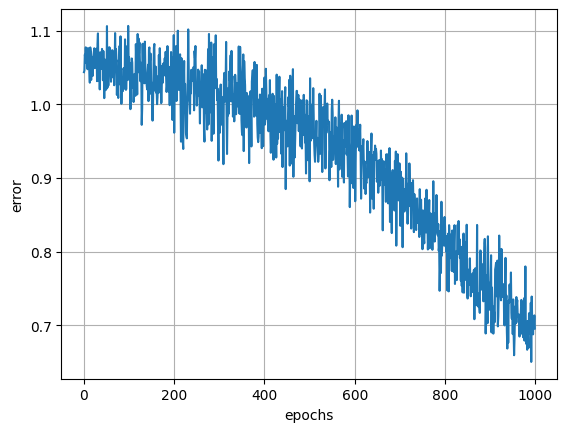

In [43]:
import matplotlib.pyplot as plt
n = list(range(1000))
plt.plot(n,listvals)
plt.xlabel('epochs')
plt.ylabel('error')
plt.grid()

Testing data

In [49]:
def testiris(model,lossfunc):

    preds = model(X_test)
    loss = lossfunc(preds,y_test)

    return loss.item(),preds
lossfun = torch.nn.CrossEntropyLoss()

listvals,preds = testiris(model,lossfun)

indices = torch.argmax(preds,dim=1)
labels ={0:'setosa',1:'versicolor',2:'vergenica'}
for i in range(indices.numel()):
  print(labels[indices[i].item()])

vergenica
setosa
vergenica
vergenica
vergenica
setosa
versicolor
vergenica
vergenica
vergenica
vergenica
setosa
setosa
setosa
setosa
vergenica
vergenica
vergenica
vergenica
vergenica
setosa
vergenica
setosa
vergenica
vergenica
vergenica
vergenica
vergenica
setosa
setosa


In [52]:
pd.DataFrame({'preds':indices.numpy(),'labels':y_test.numpy()})

,preds,labels
0,2,1.0
1,0,0.0
2,2,2.0
3,2,1.0
4,2,1.0
5,0,0.0
6,1,1.0
7,2,2.0
8,2,1.0
9,2,1.0
